## Introduction

## Getting the software

The recommended way to install the core **julia** is to download the binaries from http://julialang.org/downloads. The latest version is currently **v0.4.0-rc2**.

On OSX, the installation is via a simple app which you can download from the link below and place under `/Applications`: https://s3.amazonaws.com/julialang/bin/osx/x64/0.4/julia-0.4.0-rc2-osx10.7+.dmg

The julia terminal can be launched by double clicking the app. Note, however, that this is **not** the recommended way to use julia for work.
Instead, let us make the julia executable accessible from every terminal by adding it to search path.

#### Adding julia to PATH

We want to tell our system where to find julia, so that julia program could be run from the terminal simply with `julia prog.jl`.
Run the julia application once and type into the prompt:

~~~
julia> JULIA_HOME
/Applications/Julia-0.4.0-rc2.app/Contents/Resources/julia/bin
~~~

You should see the path to the julia executable. Now edit your `~/.bash_profile` and add

~~~
export PATH=/Applications/Julia-0.4.0-rc2.app/Contents/Resources/julia/bin:$PATH
~~~

to the end of the file, taking care to change the julia path to what was actually printed for you.

### Running julia

To run standard julia, you just need to open a terminal and type `julia`. You will then be in the REPL. You can disable the banner and version info by running `julia -q`.
~~~
$ julia
               _
   _       _ _(_)_     |  A fresh approach to technical computing
  (_)     | (_) (_)    |  Documentation: http://docs.julialang.org
   _ _   _| |_  __ _   |  Type "?help" for help.
  | | | | | | |/ _` |  |
  | | |_| | | | (_| |  |  Version 0.4.0-rc2 (2015-09-18 17:51 UTC)
 _/ |\__'_|_|_|\__'_|  |  Official http://julialang.org/ release
|__/                   |  x86_64-apple-darwin13.4.0


julia> 
~~~

Of course, any julia program, stored in a text file ending with `.jl`, can be run also in standalone mode
~~~
$ cat program.jl 
x = 0.3*pi
println("sin($x) = ", sin(x))
$ julia program.jl
sin(0.9424777960769379) = 0.8090169943749475
$
~~~

### Using the REPL

The REPL, short for Read-Eval-Print Loop, is the standard way to interact with julia while testing out new ideas. It hosts the complete julia language in an interactive prompt. Commands you type in will be interpreted, compiled and executed. You will see the output immediately.

Very briefly, the essentials of the REPL are:
  * Exit the REPL by typing *Ctrl-D* on the keyboard or `exit()` to the julia prompt.
  * *Up* and *Down* arrows navigate between the previous commands.
  * *Tab* auto-completes your command using known julia expressions.
  ~~~
  julia> Comp *press Tab*
Complex            Complex128          Complex32           Complex64           CompositeException
  ~~~
  * *Ctrl-R* enables the search through your previous commands. *Esc* to cancel, *Enter* to use the result.
    ~~~
    *press Ctrl-R, type "asd"*
    (reverse-i-search)`asd': r = TFile("asd.root", "RECREATE")
    *Enter* to execute
    ~~~
  * `ans` is a julia variable which contains the result of the last computation.
    ~~~
    julia> 1+2
    3

    julia> ans
    3
    ~~~
  * The `;` character is **not necessary as a line terminator**. However, it can be used to write multiple commands on one line, e.g.
    ~~~
    julia> x=2/3*pi; sin(x)
    0.8660254037844387
    ~~~
  * To make a multi-line command, press *Shift-Enter* to add a new line and *Enter* to finish the command. For example: 
    ~~~
    julia> x=0;for i=1:100
             x += i^2
           end
    ~~~
  

### Installing packages

In julia, downloading the julia itself gets you only the core language. Additional functionality must be added through packages.
Julia has a built-in git-based package system which does most of the work for you.

Packages will be installed to the following directory by default:
~~~
julia> Pkg.dir()
"/Users/joosep/.julia/v0.4"
~~~

You can list the installed packages and their versions using:
~~~
julia> Pkg.status()
19 required packages:
 - ApproxFun                     0.0.8
 - Blosc                         0.1.4
 - Clang                         0.0.5
 ...
~~~

Note that by default, you won't have any packages installed.

Refresh the package database which is stored on github using
~~~
julia> Pkg.update()
~~~

Now you are ready to install packages.

A list of all julia packages can be found at the official repository in http://pkg.julialang.org/. Make sure to click on `0.4` to select packages compatible with the correct version.

Julia packages are all github repositories and their names end with `.jl` to denote that they belong to the julia ecosystem. A few useful packages for physics are:
  * [PyPlot.jl](https://github.com/stevengj/PyCall.jl) for making plots using the python plotting library [matplotlib](http://matplotlib.org/).
  * [IJulia.jl](https://github.com/stevengj/IJulia.jl) the interactive notebook interface, explained in the section *Installing the notebook: IJulia*.
  * [DataFrames.jl](https://github.com/JuliaStats/DataFrames.jl) for managing tabular data.
  * [StatsBase.jl](https://github.com/JuliaStats/StatsBase.jl) for simple statistical methods, histograms.
  * [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) for manipulating probability distributions.
  * [PyCall.jl](https://github.com/stevengj/PyCall.jl) for calling python code from julia.

  
To install a package which is officially released to the julia repository (all of the above), just call the following, without the `.jl` suffix
~~~
julia> Pkg.add("PyPlot")
~~~
This will get PyPlot and all the dependencies. After a successful installation, you can use PyPlot with:

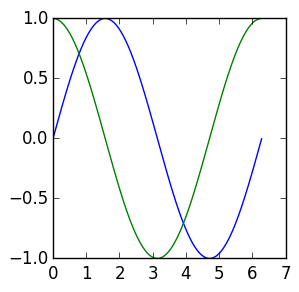

In [17]:
using PyPlot
x = 0:0.01:2*pi
PyPlot.figure(figsize=(3,3))
PyPlot.plot(x, sin(x));
PyPlot.plot(x, cos(x));

### Installing the notebook: IJulia